# Preprocess

In [2]:
from Preprocessing.prepos_text import preprocess_dataframe
import pandas as pd

dataset = pd.read_csv('/home/rnd/Downloads/dataset_tweet_sentiment_cellular_service_provider.csv')

In [3]:
dataset = preprocess_dataframe(dataset)

Processing texts: 100%|██████████| 300/300 [00:19<00:00, 15.65it/s]


In [4]:
dataset

,Id,Sentiment,Text Tweet,processed_text
0,1,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...,otheruser produk bangsa providername
1,2,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDE...",sakti alhamdulillah v providername
2,3,negative,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...,selamat pagi providername bantu kamar sinyal 4...
3,4,negative,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...,dear providername akhir2 jaring data lot banget h
4,5,negative,Selamat malam PENDUSTA <PROVIDER_NAME>,selamat malam dusta providername
...,...,...,...,...
295,296,positive,"Pantesan lancar ya, sinyal <PROVIDER_NAME> yan...",pantesan lancar ya sinyal providername 4g lanc...
296,297,positive,Alhamdulillah lancar pakai <PROVIDER_NAME>,alhamdulillah lancar pakai providername
297,298,positive,"Untung pakai internet <PROVIDER_NAME>, lancar,...",untung pakai internet providername lancar ide
298,299,positive,"di tempat ramai seperti di lokasi wisata, <PRO...",ramai lokasi wisata providername jaya


In [5]:
import pandas as pd
from collections import Counter
import re
from nltk.corpus import stopwords
import nltk

# Download stopwords bahasa Indonesia (jika belum ada)
nltk.download('stopwords')

def preprocess_text(text):
    """
    Membersihkan teks:
    - Menghapus mention (@), hashtag (#), URL, tanda baca, dan angka.
    - Mengubah ke lowercase.
    - Menghapus stopwords.
    """
    # Hapus mention, hashtag, URL
    text = re.sub(r'@\w+|#\w+|https?://\S+', '', text)
    # Hapus tanda baca dan angka
    text = re.sub(r'[^\w\s]|\d', '', text)
    # Tokenisasi dan hapus stopwords
    words = text.lower().split()
    stop_words = set(stopwords.words('indonesian'))
    words = [word for word in words if word not in stop_words and len(word) > 2]
    return words

def analyze_word_frequency(list_positive, list_negative, top_n=10):
    """
    Analisis frekuensi kata dalam sentimen positif dan negatif.
    
    Parameter:
    - list_positive: List teks dengan sentimen positif.
    - list_negative: List teks dengan sentimen negatif.
    - top_n: Jumlah kata teratas yang ditampilkan (default: 10).
    
    Returns:
    - Dictionary berisi frekuensi kata untuk positif dan negatif.
    """
    # Proses teks positif
    positive_words = []
    for text in list_positive:
        positive_words.extend(text)
    positive_freq = Counter(positive_words).most_common(top_n)
    
    # Proses teks negatif
    negative_words = []
    for text in list_negative:
        negative_words.extend(text)
    negative_freq = Counter(negative_words).most_common(top_n)
    
    return {
        'positive': positive_freq,
        'negative': negative_freq
    }



[nltk_data] Downloading package stopwords to /home/rnd/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Ambil teks dari dataset (contoh)
list_positive = dataset[dataset['Sentiment'] == 'positive']['processed_text'].tolist()
list_negative = dataset[dataset['Sentiment'] == 'negative']['processed_text'].tolist()

# Analisis frekuensi kata
result = analyze_word_frequency(list_positive, list_negative)

In [7]:
list_negative

['selamat pagi providername bantu kamar sinyal 4g hilang 1 panggil darurat url',
 'dear providername akhir2 jaring data lot banget h',
 'selamat malam dusta providername',
 'tembak paket product name ganggu ya providername',
 'rt otheruser providername kamus perhapean url',
 'keluh gak tanggap bikin emosi aja pulsa curi soak deh pulsa kurang 1500-2100 2-3 hari',
 'iklan providername pesan sembunyi url',
 'providername mampus puasa subuh2 sahur cek pulsa sedot sisa 30 ribu providername tolong baca',
 'otheruser coba pakai providername parah koneksi',
 'tuju otheruser silah boikot langgan providername dukung url',
 'bela bain daftarin kartu 4g tunggu jam siang2 puasa rumah sinyal 4gnya gak kota providername',
 'providername data hilang providername',
 'providername ga sesuai iklan',
 '150mbps kecepatanya 3kbps kuota full ga buka google udah bikin nguras uang baterai url',
 'kuota providername koneksi internetnya lambat banget product name providername url',
 'ampun sinyal 4g providername

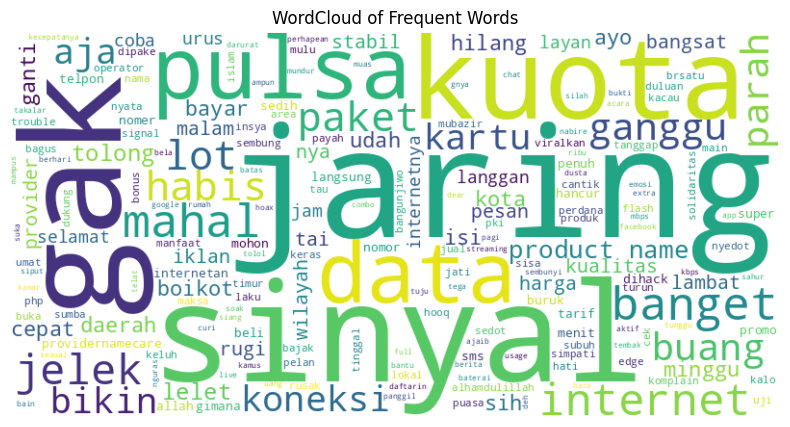

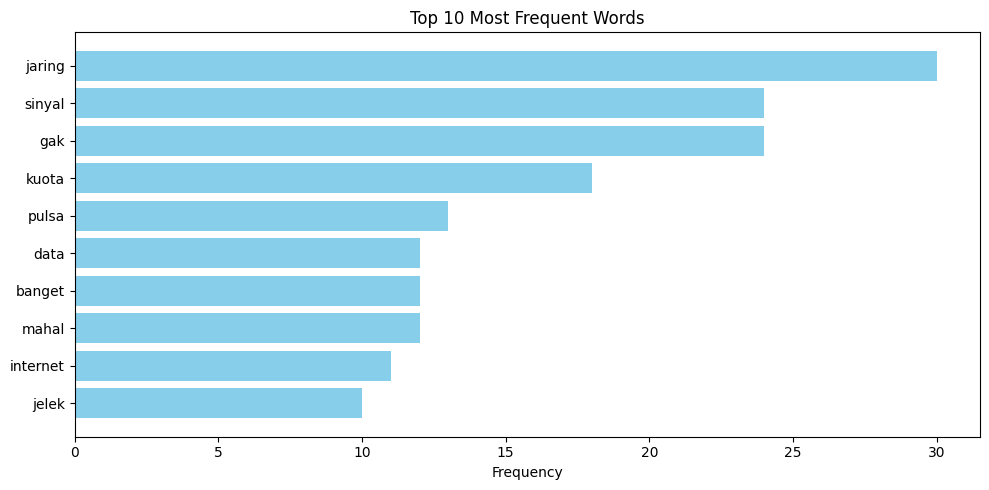

Frekuensi Kata Teratas: [('jaring', 30), ('sinyal', 24), ('gak', 24), ('kuota', 18), ('pulsa', 13), ('data', 12), ('banget', 12), ('mahal', 12), ('internet', 11), ('jelek', 10)]


In [21]:
import re
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords

def preprocess_text(text_list):
    """
    Preprocess list of text:
    - Remove 'providername', 'otheruser', 'url', etc.
    - Remove punctuation/numbers.
    - Convert to lowercase.
    - Remove stopwords (Indonesian).
    """    
    processed_texts = []
    stop_words = set(stopwords.words('indonesian'))  # Load Indonesian stopwords

    for text in text_list:
        # Remove specific patterns
        text = re.sub(r'\b(providername|otheruser|url)\b|pakai', '', text, flags=re.IGNORECASE)
        # Remove punctuation/numbers
        text = re.sub(r'[^\w\s]|\d', ' ', text)
        # Tokenize and remove stopwords
        words = [word.lower() for word in text.split() 
                 if word not in stop_words and len(word) > 2]
        processed_texts.append(' '.join(words))
    
    return ' '.join(processed_texts).split()  # Return flattened list of words

def visualize_word_frequency(text_list, top_n=20):
    """
    Analyze and visualize word frequency from a list of texts.
    
    Parameters:
    - text_list: List of raw texts.
    - top_n: Number of top words to display.
    """
    # Preprocess text
    words = preprocess_text(text_list)
    
    # Count word frequency
    word_freq = Counter(words).most_common(top_n)
    
    # Visualization 1: WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('WordCloud of Frequent Words')
    plt.show()
    
    # Visualization 2: Bar Plot
    top_words = [word[0] for word in word_freq]
    frequencies = [word[1] for word in word_freq]
    
    plt.figure(figsize=(10, 5))
    plt.barh(top_words[::-1], frequencies[::-1], color='skyblue')  # Horizontal bar
    plt.xlabel('Frequency')
    plt.title(f'Top {top_n} Most Frequent Words')
    plt.tight_layout()
    plt.show()
    
    return word_freq

# Example Usage
# Analyze & visualize word frequency for the `data` variable
word_freq = visualize_word_frequency(list_negative, top_n=10)
print("Frekuensi Kata Teratas:", word_freq)


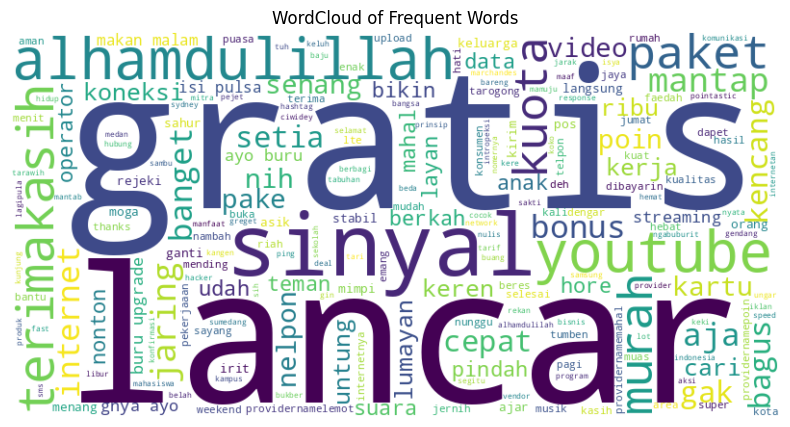

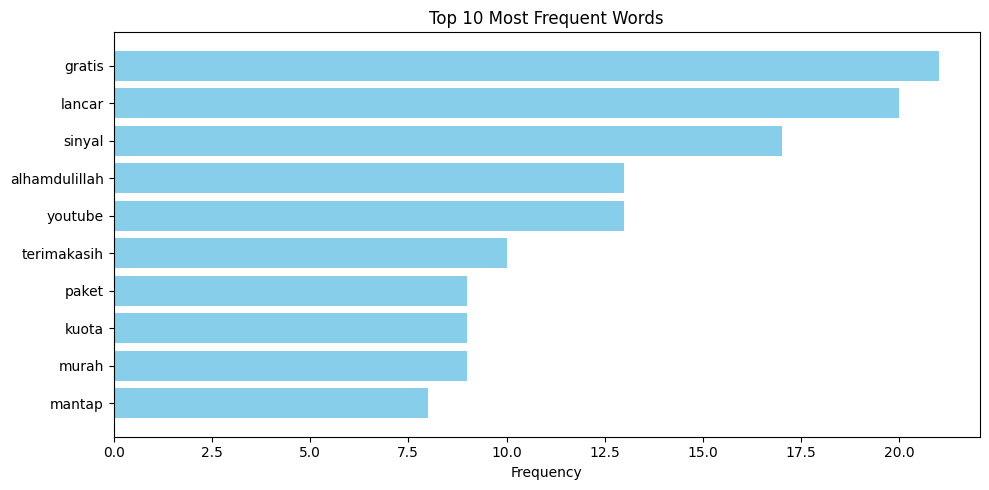

Frekuensi Kata Teratas: [('gratis', 21), ('lancar', 20), ('sinyal', 17), ('alhamdulillah', 13), ('youtube', 13), ('terimakasih', 10), ('paket', 9), ('kuota', 9), ('murah', 9), ('mantap', 8)]


In [22]:
import re
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords

def preprocess_text(text_list):
    """
    Preprocess list of text:
    - Remove 'providername', 'otheruser', 'url', etc.
    - Remove punctuation/numbers.
    - Convert to lowercase.
    - Remove stopwords (Indonesian).
    """    
    processed_texts = []
    stop_words = set(stopwords.words('indonesian'))  # Load Indonesian stopwords

    for text in text_list:
        # Remove specific patterns
        text = re.sub(r'\b(providername|product|name|otheruser|nya|url)\b|pakai', '', text, flags=re.IGNORECASE)
        # Remove punctuation/numbers
        text = re.sub(r'[^\w\s]|\d', ' ', text)
        # Tokenize and remove stopwords
        words = [word.lower() for word in text.split() 
                 if word not in stop_words and len(word) > 2]
        processed_texts.append(' '.join(words))
    
    return ' '.join(processed_texts).split()  # Return flattened list of words

def visualize_word_frequency(text_list, top_n=20):
    """
    Analyze and visualize word frequency from a list of texts.
    
    Parameters:
    - text_list: List of raw texts.
    - top_n: Number of top words to display.
    """
    # Preprocess text
    words = preprocess_text(text_list)
    
    # Count word frequency
    word_freq = Counter(words).most_common(top_n)
    
    # Visualization 1: WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('WordCloud of Frequent Words')
    plt.show()
    
    # Visualization 2: Bar Plot
    top_words = [word[0] for word in word_freq]
    frequencies = [word[1] for word in word_freq]
    
    plt.figure(figsize=(10, 5))
    plt.barh(top_words[::-1], frequencies[::-1], color='skyblue')  # Horizontal bar
    plt.xlabel('Frequency')
    plt.title(f'Top {top_n} Most Frequent Words')
    plt.tight_layout()
    plt.show()
    
    return word_freq

# Example Usage
# Analyze & visualize word frequency for the `data` variable
word_freq = visualize_word_frequency(list_positive, top_n=10)
print("Frekuensi Kata Teratas:", word_freq)


In [17]:
len(list_negative)

161

In [20]:
len(list_positive)

139